# EDA of Property Prices and Zoning Classification

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# import data
df = pd.read_csv("../data/data_clean.csv")

#TODO: data shape
df.shape

(2919, 81)

In [3]:
#TODO: view first 5 rows of data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


In [4]:
#TODO: describe numeric columns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
#TODO: check for total records in prices ("SalePrice") and zoning ("MSZoning") columns
df[["SalePrice","MSZoning"]].count()

SalePrice    1460
MSZoning     2915
dtype: int64

In [6]:
#TODO: check for an null values in prices and zoning
df[["SalePrice","MSZoning"]].isnull().sum()

SalePrice    1459
MSZoning        4
dtype: int64

In [7]:
#TODO: drop null values
df.dropna(subset=["MSZoning"], inplace=True)
df[["SalePrice","MSZoning"]].isnull().sum()

SalePrice    1455
MSZoning        0
dtype: int64

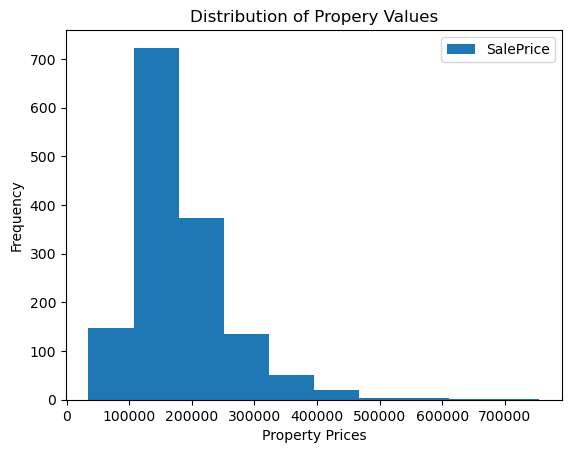

In [8]:
df.plot(kind="hist", y="SalePrice")
plt.xlabel("Property Prices")
plt.ylabel("Frequency")
plt.title("Distribution of Propery Values")
plt.show()

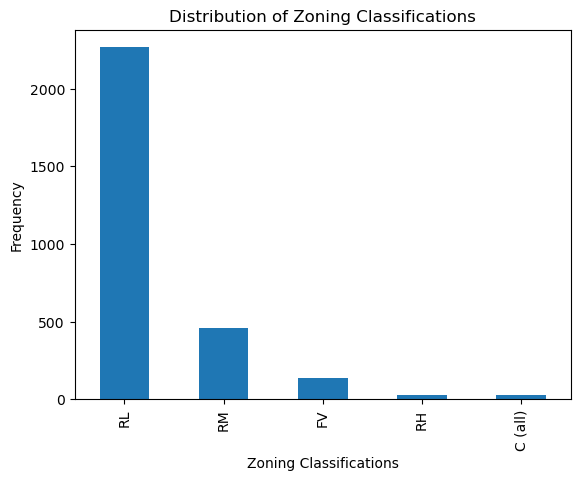

In [15]:
df["MSZoning"].value_counts().plot(kind="bar")
plt.xlabel("Zoning Classifications")
plt.ylabel("Frequency")
plt.title("Distribution of Zoning Classifications")
plt.show()

<Axes: xlabel='YrSold'>

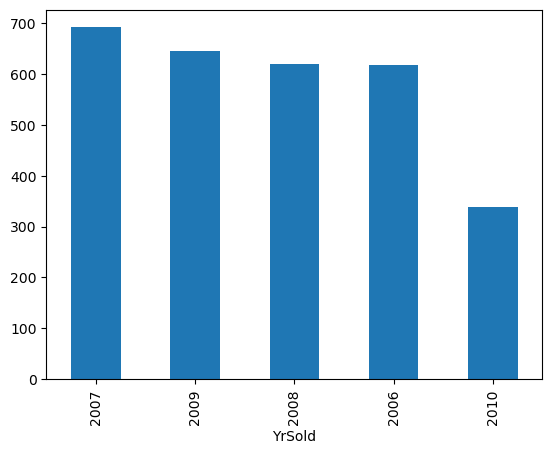

In [16]:
df["YrSold"].value_counts().plot(kind="bar")

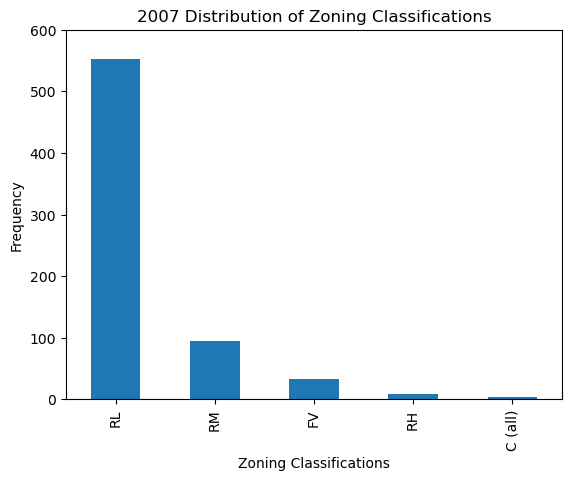

In [30]:
df[(df["YrSold"] == 2007)]["MSZoning"].value_counts().plot(kind="bar")
plt.xlabel("Zoning Classifications")
plt.ylabel("Frequency")
plt.ylim(0, 600)
plt.yticks(range(0, 601, 100))
plt.title("2007 Distribution of Zoning Classifications")
plt.show()

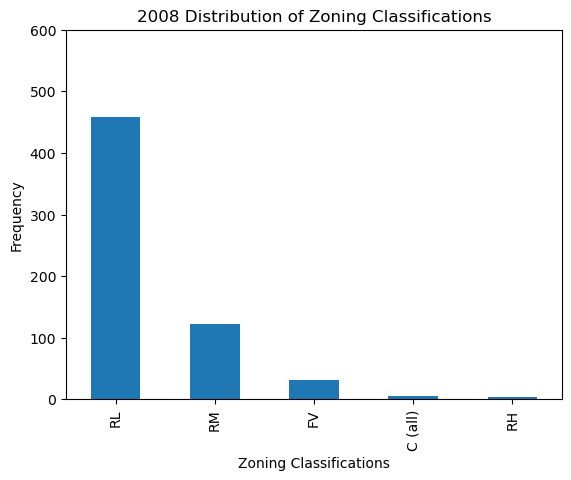

In [29]:
df[(df["YrSold"] == 2008)]["MSZoning"].value_counts().plot(kind="bar")
plt.xlabel("Zoning Classifications")
plt.ylabel("Frequency")
plt.ylim(0, 600)
plt.yticks(range(0, 601, 100))
plt.title("2008 Distribution of Zoning Classifications")
plt.show()

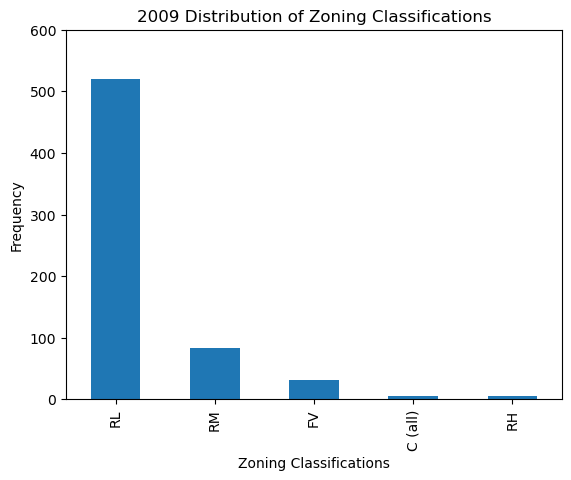

In [27]:
df[(df["YrSold"] == 2009)]["MSZoning"].value_counts().plot(kind="bar")
plt.xlabel("Zoning Classifications")
plt.ylabel("Frequency")
plt.ylim(0, 600)
plt.yticks(range(0, 601, 100))
plt.title("2009 Distribution of Zoning Classifications")
plt.show()

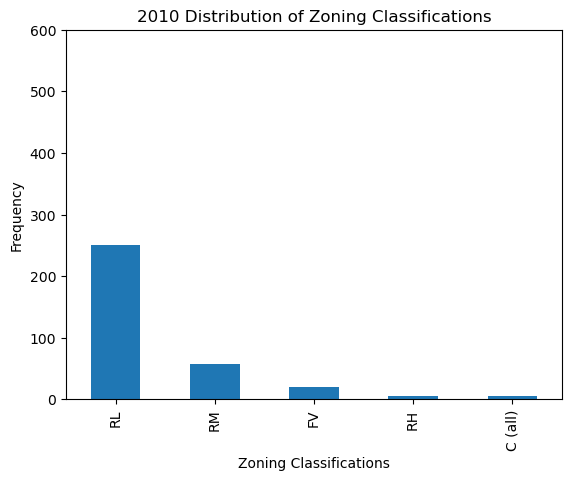

In [28]:
df[(df["YrSold"] == 2010)]["MSZoning"].value_counts().plot(kind="bar")
plt.xlabel("Zoning Classifications")
plt.ylabel("Frequency")
plt.ylim(0, 600)
plt.yticks(range(0, 601, 100))
plt.title("2010 Distribution of Zoning Classifications")
plt.show()